# Perceptronによる二項分類

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import multivariate_normal
numpy.random.seed(10)

## Parameters

In [2]:
N1 = 20         # クラス t=+1 のデータ数
Mu1 = [15,10]   # クラス t=+1 の中心座標
N2 = 30         # クラス t=-1 のデータ数
Mu2 = [0,0]     # クラス t=-1 の中心座標
Variances = [15,30] # 両クラス共通の分散（2種類の分散で計算を実施）

## データセット {x_n,y_n,type_n} を用意

In [3]:
def prepare_dataset(variance):
    cov1 = np.array([[variance,0],[0,variance]])
    cov2 = np.array([[variance,0],[0,variance]])
    df1 = DataFrame(multivariate_normal(Mu1,cov1,N1),columns=['x','y'])
    df1['type'] = 1
    df2 = DataFrame(multivariate_normal(Mu2,cov2,N2),columns=['x','y'])
    df2['type'] = -1 
    df = pd.concat([df1,df2],ignore_index=True)
    df = df.reindex(np.random.permutation(df.index)).reset_index(drop=True)
    return(df)

In [4]:
## Perceptronのアルゴリズム（確率的勾配降下法）を実行

In [5]:
def run_simulation(variance, data_graph, param_graph):
    train_set = prepare_dataset(variance)
    train_set1 = train_set[train_set['type']==1]
    train_set2 = train_set[train_set['type']==-1]
    ymin, ymax = train_set.y.min()-5, train_set.y.max()+10
    xmin, xmax = train_set.x.min()-5, train_set.x.max()+10
    data_graph.set_ylim([ymin-1, ymax+1])
    data_graph.set_xlim([xmin-1, xmax+1])
    data_graph.scatter(train_set1.x, train_set1.y, marker='o')
    data_graph.scatter(train_set2.x, train_set2.y, marker='x')
    # パラメータの初期値とbias項の設定
    w0 = w1 = w2 = 0.0
    bias = 0.5 * (train_set.x.mean() + train_set.y.mean())
    # Iterationを30回実施
    paramhist = DataFrame([[w0,w1,w2]], columns=['w0','w1','w2'])
    for i in range(30):
        for index, point in train_set.iterrows():
            x, y, type = point.x, point.y, point.type
            if(type * (w0*bias + w1*x + w2*y) <= 0):
                w0 += type * 1 
                w1 += type * x
                w2 += type * y
        paramhist = paramhist.append(
                        Series([w0,w1,w2], ['w0','w1','w2']),
                        ignore_index=True)
    # 判定誤差の計算
    err = 0
    for index, point in train_set.iterrows():
        x, y, type = point.x, point.y, point.type
        if(type * (w0*bias + w1*x + w2*y) <= 0):
            err += 1
    err_rate = err * 100 / len(train_set)
    # 結果の表示
    linex = np.arange(xmin-5, xmax+5)
    liney = - linex * w1 / w2 - bias * w0 / w2
    label = "ERR %.2f%%" % err_rate
    data_graph.plot(linex,liney,label=label,color='red')
    #data_graph.legend(loc=1)
    data_graph.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    paramhist.plot(ax=param_graph)
    #param_graph.legend(loc=1)
    param_graph.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

## Main

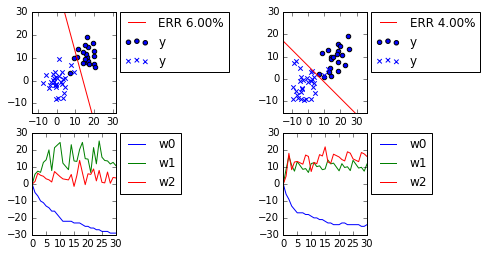

In [6]:
fig = plt.figure()
# 2種類の分散で実行
for c, variance in enumerate(Variances):
    subplots1 = fig.add_subplot(2, 2, c + 1)
    subplots2 = fig.add_subplot(2, 2, c +2 + 1)
    fig.subplots_adjust(wspace = 2)
    run_simulation(variance, subplots1, subplots2)
fig